In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, r2_score, plot_confusion_matrix
import joblib

In [2]:
dataset_train = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-Decision-Tree/Datasets/Social_Network_Ads_Train.csv")
dataset_test = pd.read_csv("/home/tintin/Study/Data-science/Statistical-machine-learning/Learn-Decision-Tree/Datasets/Social_Network_Ads_Test.csv")
dataset_train

,Unnamed: 0,User ID,Gender,Age,EstimatedSalary,Purchased
0,0,15624510,Male,19,19000,0
1,1,15810944,Male,35,20000,0
2,2,15668575,Female,26,43000,0
3,3,15603246,Female,27,57000,0
4,4,15804002,Male,19,76000,0
...,...,...,...,...,...,...
295,295,15725794,Female,36,63000,0
296,296,15673539,Male,42,73000,1
297,297,15705298,Female,43,112000,1
298,298,15675791,Male,45,79000,0


In [3]:
# Data preprocessing
X_train = dataset_train.iloc[:,[3,4]].values
Y_train = dataset_train.iloc[:,5].values
X_test = dataset_test.iloc[:,[3,4]].values
Y_test = dataset_test.iloc[:,5].values

In [4]:
# Feature Scaling
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [5]:
def VisualizingDataset(X_, Y_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    for i, label in enumerate(np.unique(Y_)):
        plt.scatter(X1[Y_ == label], X2[Y_ == label])

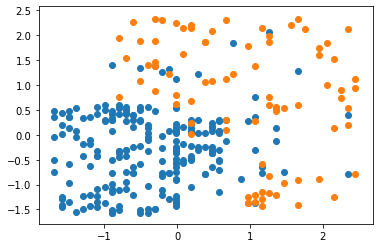

In [6]:
VisualizingDataset(X_train, Y_train)
plt.show()

In [7]:
# Training model
classifier = DecisionTreeClassifier(criterion = "entropy")
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
def VisualizingResult(model, X_):
    X1 = X_[:, 0]
    X2 = X_[:, 1]
    X1_range = np.arange(start= X1.min()-1, stop= X1.max()+1, step = 0.01)
    X2_range = np.arange(start= X2.min()-1, stop= X2.max()+1, step = 0.01)
    X1_matrix, X2_matrix = np.meshgrid(X1_range, X2_range)
    X_grid= np.array([X1_matrix.ravel(), X2_matrix.ravel()]).T
    Y_grid= model.predict(X_grid).reshape(X1_matrix.shape)
    plt.contourf(X1_matrix, X2_matrix, Y_grid, alpha = 0.5, cmap = ListedColormap(("red", "green")))

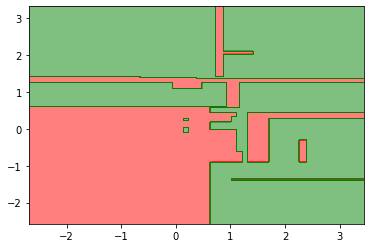

In [10]:
VisualizingResult(classifier, X_train)
plt.show()

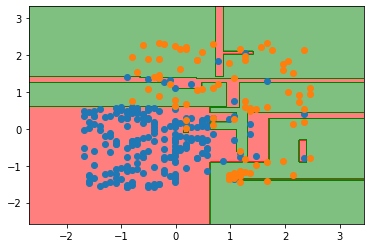

In [11]:
VisualizingResult(classifier, X_train)
VisualizingDataset(X_train, Y_train)
plt.show()

Confusion matrix of training model:  [[219   0]
 [  2  79]]
Confusion matrix of testing model:  [[34  4]
 [16 46]]


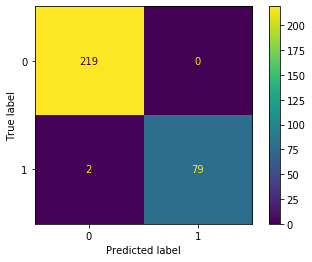

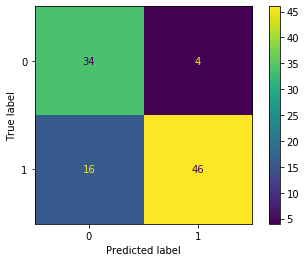

In [17]:
# Evaluating training and testing model
cm = confusion_matrix(Y_train, classifier.predict(X_train))
plot_confusion_matrix(classifier, X_train, Y_train)
print("Confusion matrix of training model: ",cm)

cm = confusion_matrix(Y_test, classifier.predict(X_test))
print("Confusion matrix of testing model: ",cm)
plot_confusion_matrix(classifier, X_test, Y_test)

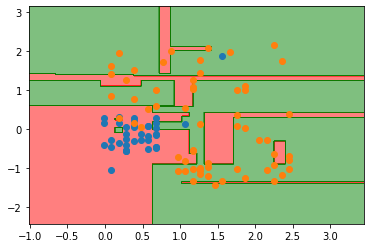

In [19]:
VisualizingResult(classifier, X_test)
VisualizingDataset(X_test, Y_test)
plt.show()

In [18]:
accuracy_score = classifier.score(X_test, Y_test)
print("Accuracy of train model: ", classifier.score(X_train,Y_train))
print("Accuracy of test model: ",accuracy_score)

Accuracy of train model:  0.9933333333333333
Accuracy of test model:  0.8


In [20]:
def compare(i_example):
    x = X_test[i_example : i_example + 1]
    y = Y_test[i_example]
    y_pred = classifier.predict(x)
    x_inv = SC.inverse_transform(x)
    print(x_inv, y, y_pred)

In [21]:
for i in range(7, 12):
    compare(i)

[[4.70e+01 1.13e+05]] 1 [0]
[[3.60e+01 1.25e+05]] 1 [1]
[[3.8e+01 5.0e+04]] 0 [0]
[[4.2e+01 7.0e+04]] 0 [1]
[[3.9e+01 9.6e+04]] 1 [1]
